In [1]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
from scipy import signal
import matplotlib.pyplot as plt
#mpl.style.use('default')
#mpl.rcParams['text.color'] = 'w'

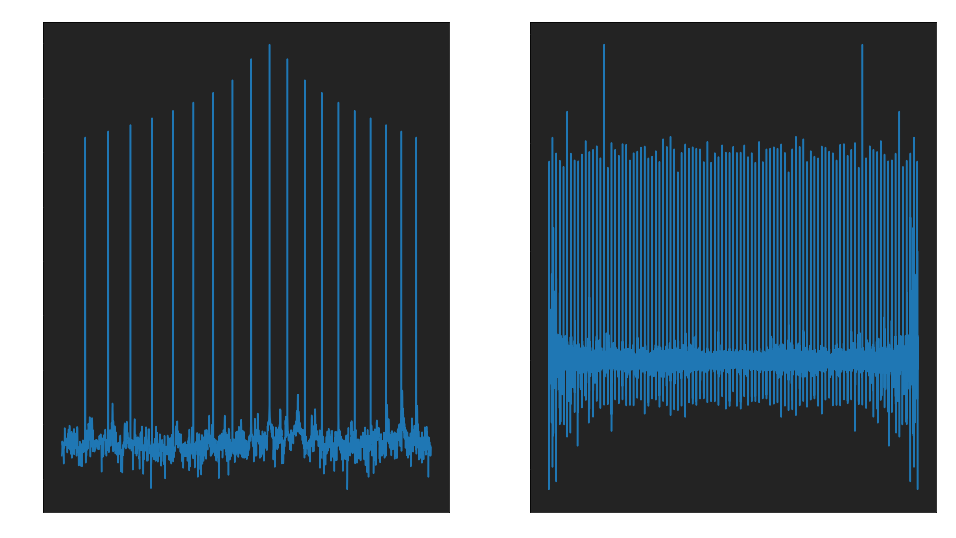

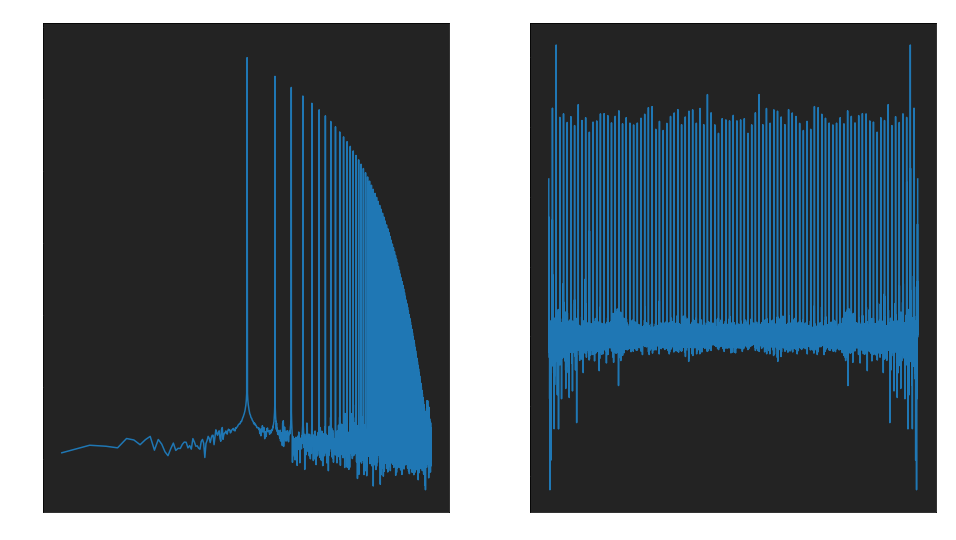

In [3]:
fc = 40e3
f0 = 1e3
fs = 192e3

periods = 100
nsamples = np.ceil(periods *fs/f0).astype('int')
t=np.r_[0:nsamples]/fs
carrier = np.sin(2*np.pi*fc*t)
audio = np.sin(2*np.pi*f0*t)
envelope = np.sqrt(1+0.95*audio)
modulated = envelope*carrier

modulated_spectrum = fft(modulated)
modulated_magnitude = np.abs(modulated_spectrum)
modulated_phase = np.unwrap(np.angle(modulated_spectrum))
modulated_cepstrum = ifft(np.log(modulated_magnitude))

envelope_spectrum = fft(envelope)
envelope_magnitude = np.abs(envelope_spectrum)+1e-32
envelope_phase = np.unwrap(np.angle(envelope_spectrum))
envelope_cepstrum = ifft(np.log(envelope_magnitude))

f = fftfreq(nsamples,1/fs)
fidx = (f>30e3) & (f<50e3)

plt.subplot(1,2,1)
plt.loglog(f[fidx],modulated_magnitude[fidx])
plt.title('Spectrum of modulated carrier')
plt.subplot(1,2,2)
plt.plot(np.real(modulated_cepstrum[1:]))
plt.title('Cepstrum of modulated carrier')
plt.show()

plt.subplot(1,2,1)
plt.loglog(f,envelope_magnitude)
plt.title('Spectrum of envelope')
plt.subplot(1,2,2)
plt.plot(np.real(envelope_cepstrum[1:]))
plt.title('Cepstrum of envelope')
plt.show()